# Modeling
## Single Input Model
- Fit and access Models predicting the average ACT score from each of the input variables. You might try polynomial linear regression modes, as appropriate.
- We'll start to model the relationship between socioeconomic variables and the average ACT score at the school. We'll consider single input model where we're only taking an input variable. We'll transform it by trying polynomial linear regression but there will be one input variable at a time

## Median Income
Plot the Regression line and the scatter plot

In [2]:
# import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn for a data visualization library built on matplotlib
import seaborn as sns
#set the plot style
sns.set_style("whitegrid")

# Model Processing
from sklearn.preprocessing import StandardScaler

#Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model Metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm


In [3]:
df = pd.read_csv('../data/education_clean.csv')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


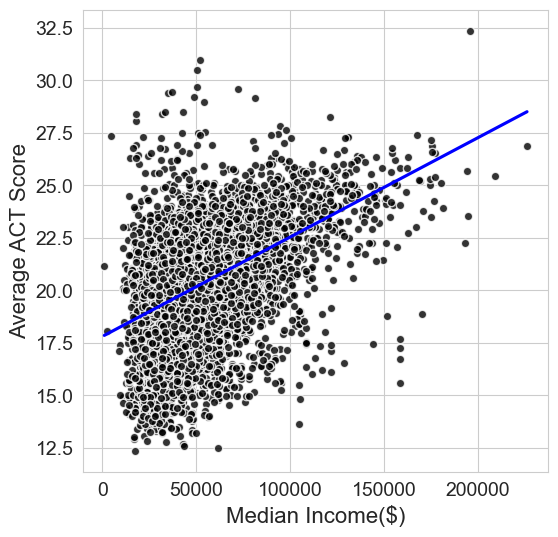

In [5]:
plt.figure(figsize=(6,6))

sns.regplot(
    data=df, 
    x='median_income', 
    y = 'average_act', 
    color='blue', 
    ci= False, 
    scatter_kws={'color': 'black', 'edgecolor': 'white', 'linewidths': 1}
)

# add x axis label
plt.xlabel('Median Income($)', fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

There is a relationship between median income and average ACT score and it appears that this simple linear regression is providing only a moderate fit of data. To actually fit the model and then we will access it using numerical and graphical methods.

### Fit the simple linear regression model
we're using STATs model's ordinary least squares function with the formula version. It is going to be predicted by a simple linear regression model using median income as the predictor.

In [137]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()

#display the fit summary
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:38:09   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

- The intercept of this model is 17.8 and coefficient on median income is 4.732e-05. 
- The p-value(P>|t|) is small, So we have statistically significant coefficients.
- low R squared (0.211) 

### Numerical Accessment of fit accuracy


In [138]:
# Compute R-squared
model_median_income.rsquared

np.float64(0.21118648979300636)

In [139]:
# Compute the RMSE (root mean squared error)
y_hat = model_median_income.predict()
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

In [140]:
# Compute the mean absolute error (MAE)
mean_absolute_error(df['average_act'], y_hat)

1.712938698068859

That tells us directly, on average, what was the error between regression model and what the actual values in this case for the ACT score were. The average error was 1.7 which means there is a relatively small error in terms of range possible values for an ACT score. IT means we could predict ACT score with this input variable.

### Access Model using graphical method
The standard approach is to use residual plot that will show the relationshipn between the predicted ACT score and the residuals that is the error between the actual value and prediction.

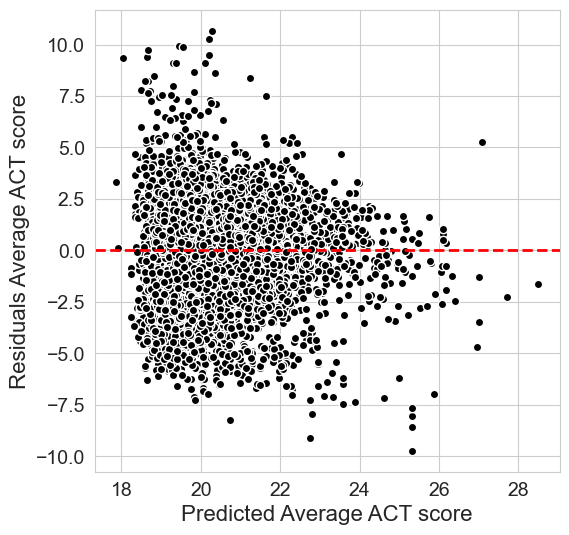

In [141]:
plt.figure( figsize=(6,6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted Average ACT score', fontsize=16)
plt.ylabel('Residuals Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)
plt.show()

This is not purely a cloud of points. So, we will consider a quadratic polynomial regression model.

### Quadratic Model. plot the regression curves and scatter plot
So we will start off looking at the model through graphical methods and seaborn's reg plot.

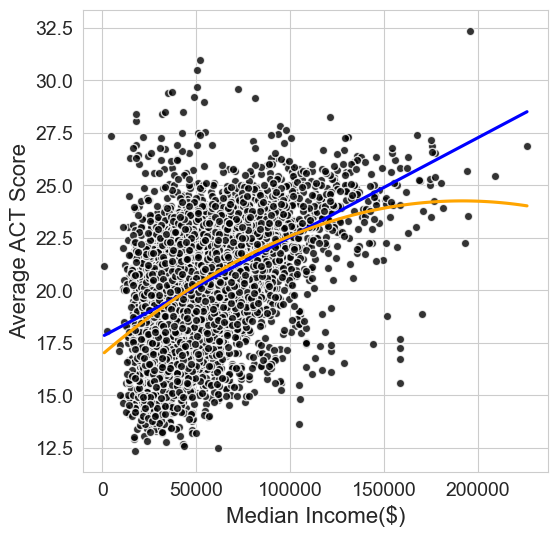

In [ ]:
plt.figure(figsize=(6,6))

sns.regplot(
    data=df,
    x='median_income',
    y='average_act',
    color='blue',
    ci=False,
    scatter_kws={'color': 'black', 'edgecolor': 'white', 'linewidths': 1})

sns.regplot(
    data=df,
    x='median_income',
    y='average_act',
    order=2,
    color='orange',
    ci=False,
    scatter= False)

# add x axis label
plt.xlabel('Median Income($)', fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)
plt.show()


### Fit quadratic models linear regression model
we've added a squared version of median income 

In [143]:
model_median_income2 = smf.ols(formula='average_act ~ median_income + I(median_income**2)', data=df).fit()  

# Look at the fit summary
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:38:11   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

- R squared is slightly higher than the previous one
- Coefficient is significant

### Access the model significance

In [144]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

In [145]:
# use anova to compare these two nested polynomial regression models
anova_lm(model_median_income, model_median_income2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7225.0,35865.012794,0.0,NaN,NaN,NaN
1,7224.0,35505.105960,1.0,359.906834,73.227974,1.395848e-17


### Access the model accuracy 

In [146]:
#compute the mean absolute error
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257968228

Mean absolute error 2 is not practically smaller. This shows us that we have the ability to look at socioeconomic variables and average ACT score. But it is a weak prediction. and we've also seen that a linear model is probably sufficient to predict ACT score. Quadratic is not neccessary to provide a better fit.

## Multiple linear regression
fit the multiple linear regression model using all socioeconomic variables as predictors. We will use 5 socioeconomic variable in EDGAP dataset.

In [147]:
model = smf.ols(
    formula = 'average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch', data =df).fit()

#print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:38:11   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

- Coefficient on percent married and median income has large p-value which means they are not statiscally significant.
- We do not need all these predictors in a single model
- R squared is much larger than the other predictor models.

### Use Residual plot for graphical assessment of model fit

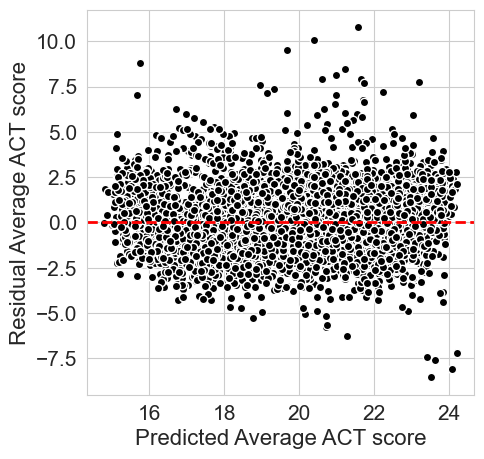

In [148]:
y_hat = model.predict()

plt.figure(figsize=(5,5))

plt.plot(y_hat, model.resid,"ko",mec = "w")
plt.axhline(0, color='r', linestyle= 'dashed', lw=2)

plt.xlabel('Predicted Average ACT score', fontsize=16)
plt.ylabel('Residual Average ACT score', fontsize=16)

plt.tick_params(labelsize=15)
plt.show()

- No structure to the residual plot, which means we're unlikely to improve the model by the transformations of the input variables in the model

### Do numerical assessment

In [149]:
mean_absolute_error(df['average_act'], model.predict())

1.1453304788861731

### Summary
1. The multiple linear regression model with all socioeconomic predictors can predict ACT score with an average error of roughly 1 point using these predictors.
2. The residual plot suggested that there will be limited improvement from adding transformation of these predictors.
3. Not all predictors have significant coefficient.
4. Adding predictors to the model may improve the performance.

## Fit a Reduced Model with significant predictors

In [150]:
model_reduced = smf.ols(
    formula = 'average_act ~ rate_unemployment + percent_college + percent_lunch', data=df
).fit()

print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:38:11   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

### Use a residual plot for graphical assessment of model fit

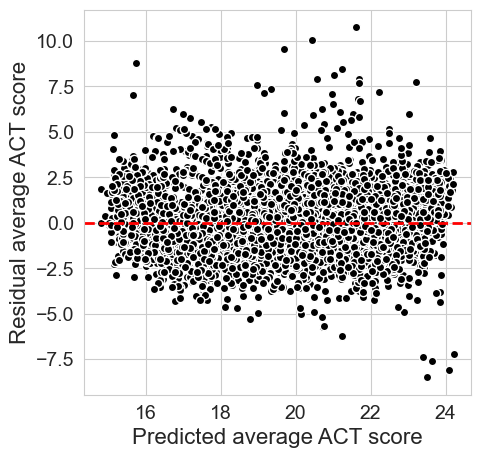

In [151]:
y_hat = model_reduced.predict()

plt.figure(figsize=(5,5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle= 'dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)
plt.show()

- similar residual plot with the full model
- no structure to the model which means we do not need to include any transformations

In [152]:
# Compute the mean absolute error
mean_absolute_error(df['average_act'], model_reduced.predict())

1.1454832950346414

In [153]:
# Compare the accuracy between full and reduced models
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({ 'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
              index=['full model', 'reduced model']).round(4)

,Mean Absolute Error,R-squared
full model,1.1453,0.6280
reduced model,1.1455,0.6279


### Use an Anova to test the significant of difference between models

In [154]:
anova_lm(model, model_reduced)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7221.0,16915.612457,0.0,NaN,NaN,NaN
1,7223.0,16916.619167,-2.0,-1.006711,0.214921,NaN


There is no statiscally significant difference between reduced model and full model.

### Summary
1. The model predicting ACT score from rate unemployment, percent college, and percent lunch is not significantly different than the models with all five socioeconomic variables as predictor.
2. Adding predictor to the model may improve performance.
3. We have not yet determined the relative importance of each predictor in the model.

## Scaling
We're going to scale the predictors in reduced model to have mean 0 and Standard deviation 1 and add them to data frame

In [155]:
predictor_variables  = ['rate_unemployment', 'percent_college', 'percent_lunch']

scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [156]:
scaler = StandardScaler().fit(df[predictor_variables])
df[scaled_columns] = scaler.transform(df[predictor_variables])

### Check the mean and SD of the transformed data

In [157]:
df[scaled_columns].agg(['mean','std']).round(3)

,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized
mean,-0.0,0.0,-0.0
std,1.0,1.0,1.0


### Fit the multiple linear regression model with normalized predictors

In [158]:
model_normalized = smf.ols(
    formula = 'average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized', data = df
    ).fit()

print(model_normalized.summary())


                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:38:12   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Compare mean absolute error between the original and normalized models

In [159]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R squared': [r2_normalized, r2_reduced]},
              index=['normalized model', 'reduced model']).round(4)

,Mean Absolute Error,R squared
normalized model,1.1455,0.6279
reduced model,1.1455,0.6279


- No change -> does not lead to overall change in linear regression model
- it only changed coefficients 

### Summary
1. The percent of the school receiving fee or reduced price lunch was the strongest predictor in this analysis

# Evaluation
1. Did you formulate the question in such a way that it addresses the original problem and can be answered with data?

-> we have examined how socioeconomic variables predict average ACT score. We chose variable (average_act) and predictors (socioeconomic variables) which directly allows us to test the research question.

2. Were there limitations in the quality of the data?

-> The data is generally sufficient. However, Some predictors (percent married, median
income) have large p-values so it is not statistically significant.
R² values (median_income: 0.211) are low. So, predictors only explain part of the variation.

3. Did the results (graphs, summaries, regression models) allow you to answer the question?

-> From the result, The regression model and plot has relationship, so socioeconomic variable probably could predict ACT score.

4. Can you state quantitatively how well you can explain the average ACT score using the socioeconomic predictors?

-> We are able to explain ACT scores using socioeconomic predictors because the model predicts ACT scores with a mean absolute error of around 1, and the R² is 0.62.

5. Which variable is the strongest predictor of the average ACT score? Why might the percentage of students eligible for free or reduced price lunch be a stronger prediction than the median income?

-> The strongest predictor might be the percent lunch because percent lunch normalized has the largest coefficient and is statistically significant. And Median income has smaller effect and sometimes is insignificant so it is less predictive.

You should consider these questions when you participate in the class discussion about your evaluation of the work.

